## Respiratory Viruses ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import geopandas as gpd
from scipy.stats import linregress
import os

In [2]:
# Define the path to the 'Outputdata' folder
output_dir = 'Outputdata'

In [3]:
# Study data files 
respiratory_viruses = "respiratory_viruses_dataset.csv"

# Read the 'respiratory_viruses_dataset' data
respiratory_viruses_data = pd.read_csv(respiratory_viruses, encoding='ISO-8859-1') # As 'ISO-8859-1' can handle with a wide range of characters

# Display the data table for preview
respiratory_viruses_data.head()

,WHOREGION,FLUSEASON,HEMISPHERE,ITZ,COUNTRY_CODE,COUNTRY_AREA_TERRITORY,ISO_WEEKSTARTDATE,ISO_YEAR,ISO_WEEK,MMWR_WEEKSTARTDATE,...,PARAINFLUENZA,RHINO,RSV,OTHERRESPVIRUS,OTHER_RESPVIRUS_DETAILS,LAB_RESULT_COMMENT,WCR_COMMENT,ISO2,ISOYW,MMWRYW
0,EUR,NH,NH,FLU_SW_EUR,BIH,Bosnia and Herzegovina,7/11/2011,2011,45,6/11/2011,...,NaN,NaN,NaN,NaN,RSV,?????,?????,BA,201145,201145
1,AMR,YR,NH,FLU_CNT_AMC,SLV,El Salvador,1/05/2023,2023,18,30/04/2023,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,SV,202318,202318
2,AFR,YR,NH,FLU_MID_AFR,SSD,South Sudan,8/11/2021,2021,45,7/11/2021,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,SS,202145,202145
3,EUR,NH,NH,FLU_EST_EUR,UKR,Ukraine,21/04/2014,2014,17,20/04/2014,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,UA,201417,201417
4,EUR,NH,NH,FLU_EST_EUR,CZE,Czechia,23/02/2015,2015,9,22/02/2015,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,CZ,201509,201508


In [4]:
# Data Cleaning
cleaned_df = respiratory_viruses_data.dropna(subset=['INF_A', 'INF_B', 'INF_ALL', 'HUMAN_CORONA', 'RSV', 'RHINO', 'PARAINFLUENZA'])
cleaned_df

,WHOREGION,FLUSEASON,HEMISPHERE,ITZ,COUNTRY_CODE,COUNTRY_AREA_TERRITORY,ISO_WEEKSTARTDATE,ISO_YEAR,ISO_WEEK,MMWR_WEEKSTARTDATE,...,PARAINFLUENZA,RHINO,RSV,OTHERRESPVIRUS,OTHER_RESPVIRUS_DETAILS,LAB_RESULT_COMMENT,WCR_COMMENT,ISO2,ISOYW,MMWRYW
12,AMR,YR,SH,FLU_TRP_SAMR,BOL,Bolivia (Plurinational State of),11/01/2016,2016,2,10/01/2016,...,1.0,0.0,2.0,0.0,NaN,NaN,NaN,BO,201602,201602
30,AMR,YR,NH,FLU_CNT_AMC,DOM,Dominican Republic,21/03/2016,2016,12,20/03/2016,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,DO,201612,201612
42,AMR,YR,NH,FLU_CNT_AMC,CUB,Cuba,15/06/2015,2015,25,14/06/2015,...,16.0,9.0,3.0,1.0,Other,NaN,NaN,CU,201525,201524
45,AMR,YR,NH,FLU_CNT_AMC,GTM,Guatemala,24/04/2023,2023,17,23/04/2023,...,6.0,8.0,6.0,3.0,NaN,NaN,NaN,GT,202317,202317
84,WPR,NH,NH,FLU_EST_ASIA,MNG,Mongolia,7/02/2022,2022,6,6/02/2022,...,3.0,9.0,19.0,NaN,NaN,NaN,NaN,MN,202206,202206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157961,AMR,YR,SH,FLU_TRP_SAMR,BOL,Bolivia (Plurinational State of),17/08/2015,2015,34,16/08/2015,...,1.0,0.0,2.0,0.0,Other,NaN,NaN,BO,201534,201533
157981,AMR,YR,NH,FLU_CNT_AMC,BLZ,Belize,3/01/2022,2022,1,2/01/2022,...,2.0,6.0,2.0,NaN,NaN,NaN,NaN,BZ,202201,202201
157987,AMR,YR,NH,FLU_TRP_SAMR,SUR,Suriname,15/08/2016,2016,33,14/08/2016,...,0.0,1.0,1.0,0.0,NaN,NaN,NaN,SR,201633,201633
157990,WPR,NH,NH,FLU_EST_ASIA,JPN,Japan,2/01/2017,2017,1,1/01/2017,...,3.0,10.0,12.0,NaN,NaN,NaN,NaN,JP,201701,201701


In [5]:
summary = cleaned_df.describe()
summary

,ISO_YEAR,ISO_WEEK,MMWR_YEAR,MMWR_WEEK,SPEC_PROCESSED_NB,SPEC_RECEIVED_NB,AH1N12009,AH1,AH3,AH5,...,ADENO,BOCA,HUMAN_CORONA,METAPNEUMO,PARAINFLUENZA,RHINO,RSV,OTHERRESPVIRUS,ISOYW,MMWRYW
count,8631.000000,8631.000000,8631.000000,8631.000000,8299.000000,2706.000000,8576.000000,6279.000000,8584.000000,2142.0,...,8608.000000,7925.000000,8631.000000,8177.000000,8631.000000,8631.000000,8631.000000,7266.000000,8631.000000,8631.000000
mean,2020.301008,24.628432,2020.300892,24.597613,973.829739,2154.011826,18.374534,0.002070,20.596109,0.0,...,9.983039,1.122145,8.586606,9.704048,12.229869,30.504808,40.586838,4.369254,202054.729232,202054.686827
std,2.776786,15.176930,2.777028,15.175503,3529.562846,5745.771400,85.891549,0.057799,98.524174,0.0,...,27.838134,5.242742,40.578958,38.801895,42.717246,103.763154,196.672420,15.630913,275.943574,276.025862
min,2015.000000,1.000000,2014.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,201501.000000,201453.000000
25%,2018.000000,11.000000,2018.000000,11.000000,36.000000,48.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,201823.000000,201823.000000
50%,2021.000000,23.000000,2021.000000,23.000000,91.000000,166.000000,1.000000,0.000000,1.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,202125.000000,202125.000000
75%,2023.000000,38.000000,2023.000000,38.000000,298.000000,849.000000,8.000000,0.000000,8.000000,0.0,...,7.000000,0.000000,2.000000,4.000000,6.000000,12.000000,14.000000,0.000000,202317.000000,202317.000000
max,2024.000000,53.000000,2024.000000,53.000000,44884.000000,44884.000000,2487.000000,3.000000,2797.000000,0.0,...,376.000000,226.000000,708.000000,496.000000,617.000000,1416.000000,3523.000000,246.000000,202425.000000,202425.000000


## Pie Chart: Most Common Viruses Proportion ##

In [6]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

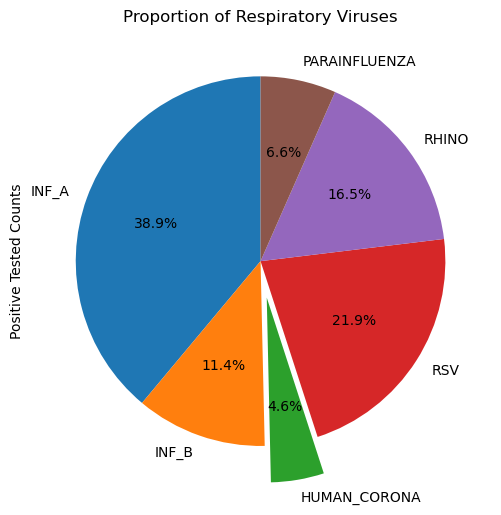

In [7]:
# Visualization
## Pie Chart for Virus Proportion
virus_list = ['INF_A', 'INF_B', 'HUMAN_CORONA', 'RSV', 'RHINO', 'PARAINFLUENZA']
virus_counts = cleaned_df[virus_list].sum()
plt.figure(figsize=(10, 6))

# Only "explode" the 'HUMAN_CORONA' 
explode = (0, 0, 0.2, 0, 0, 0)

virus_counts.plot.pie(autopct='%1.1f%%', explode=explode,
                      startangle=90,
                      colors=[colors[i % len(colors)] for i in range(len(virus_list))])

plt.title('Proportion of Respiratory Viruses')
#plt.legend(loc = 'upper right')
plt.ylabel('Positive Tested Counts')

# Save the figure to the 'Outputdata' directory
figure_path = os.path.join(output_dir, 'Proportion_of_Respiratory_Viruses.png')
plt.savefig(figure_path)

plt.show()

## Bar Chart: Geographic Viruses Attribution ##

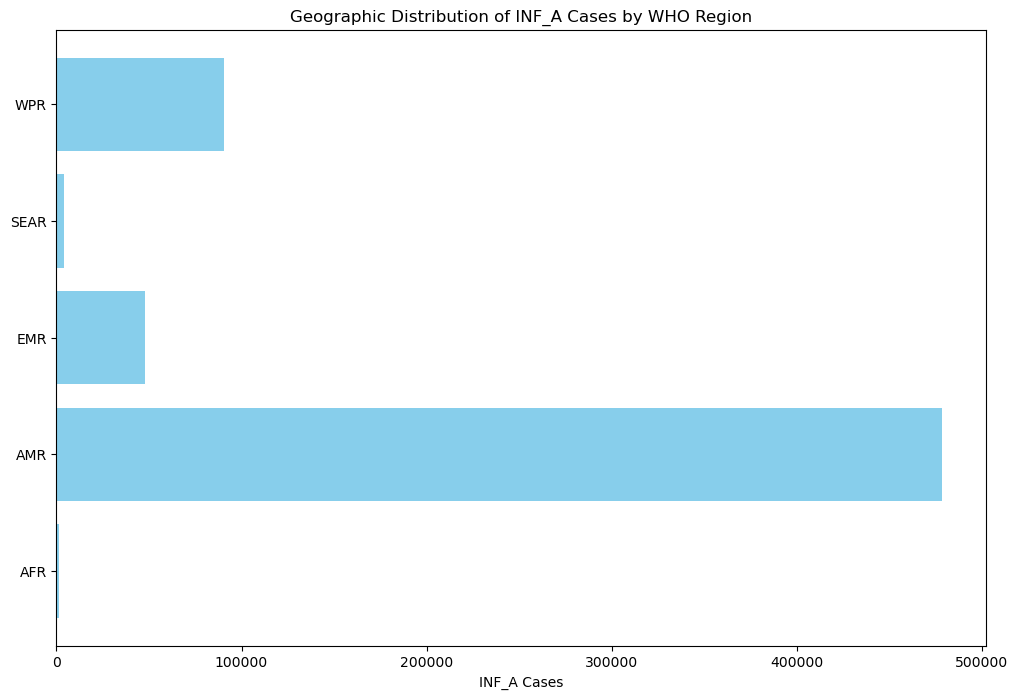

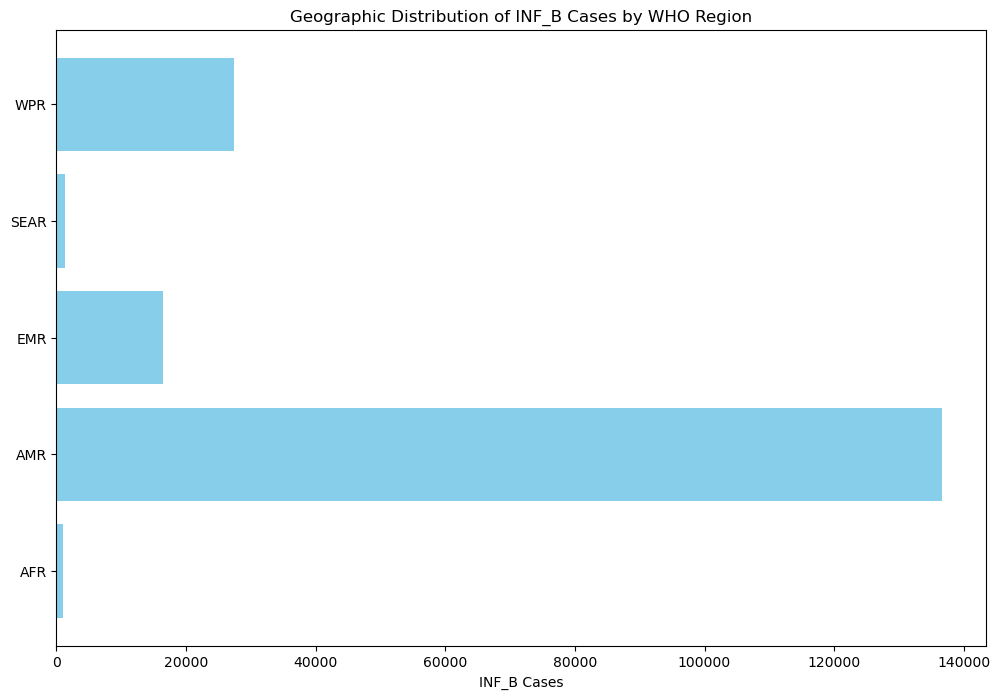

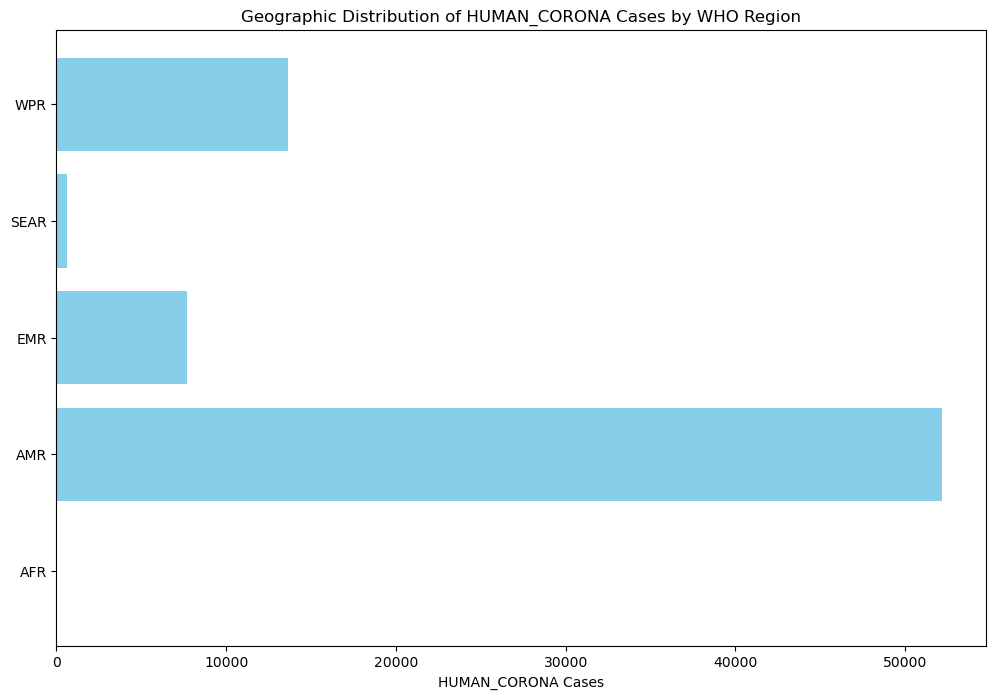

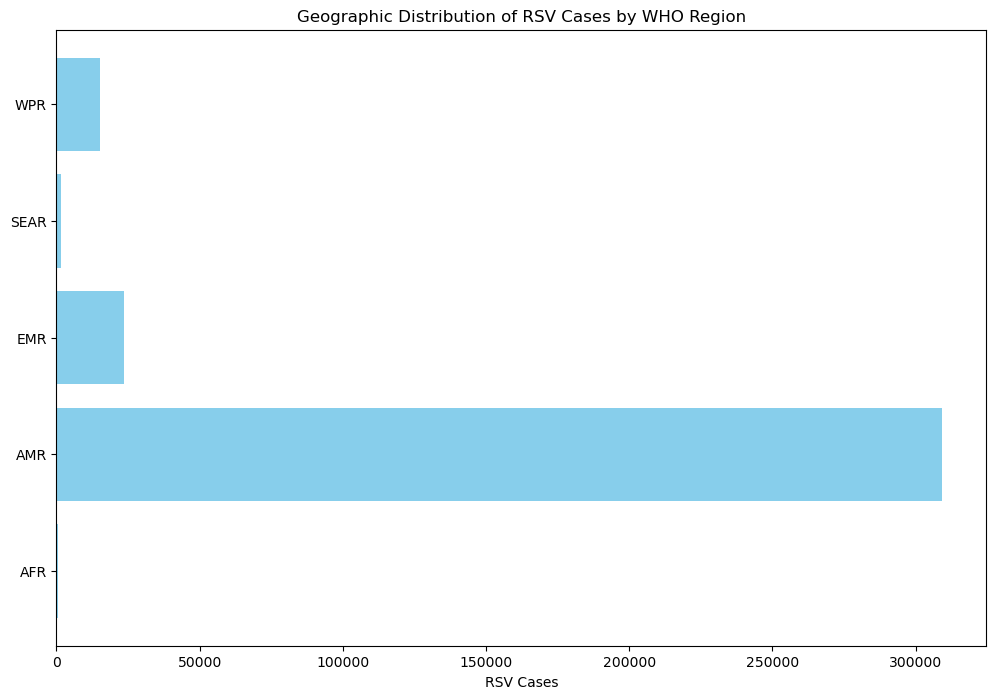

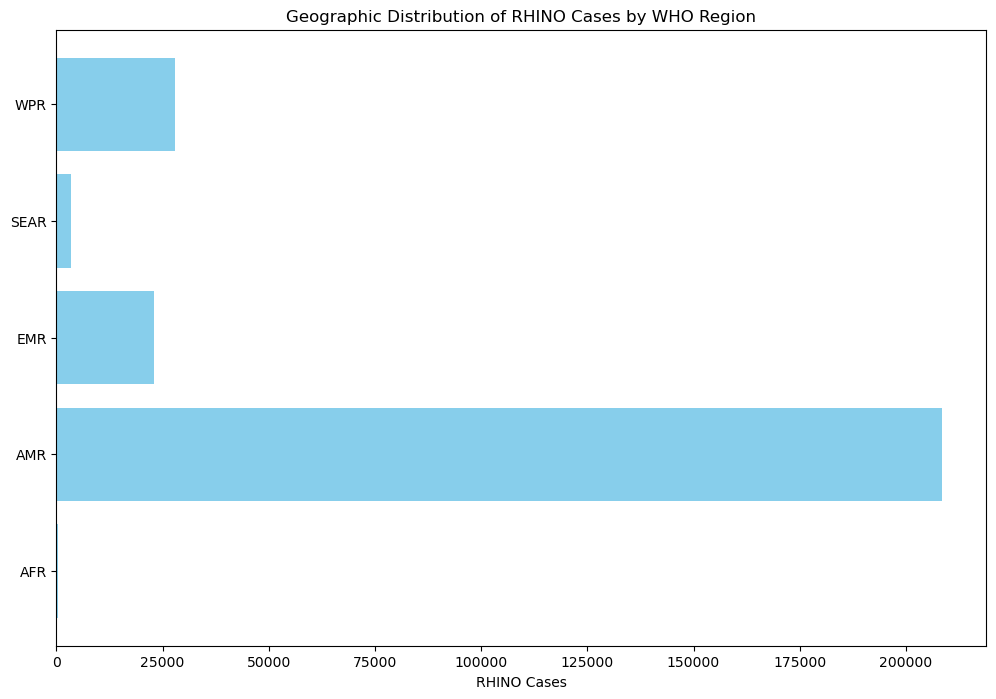

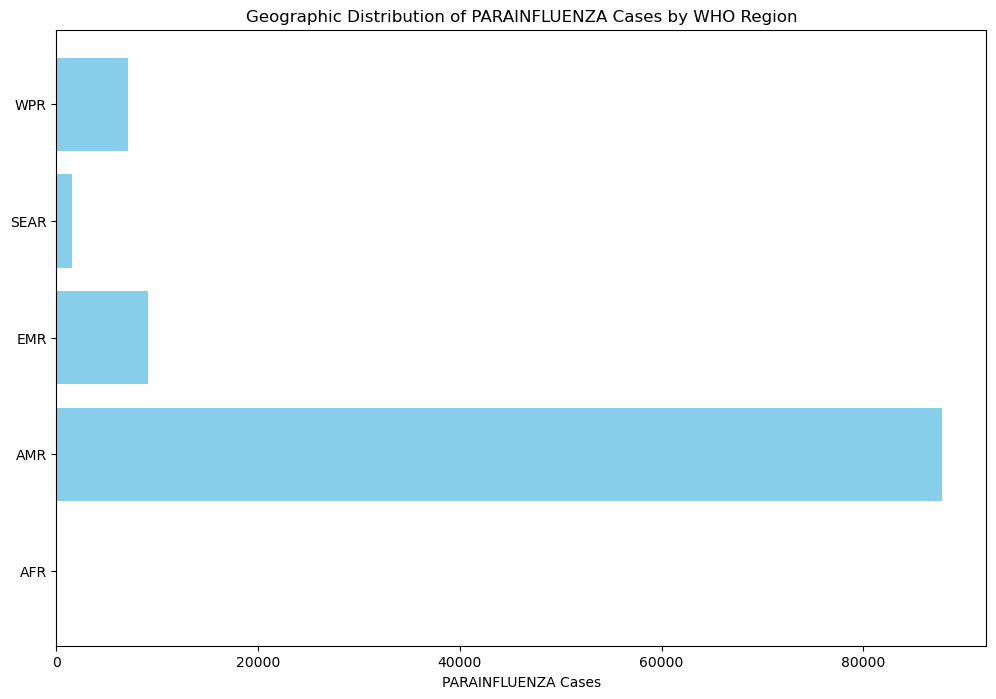

In [8]:
# Plot the bar chart for each virus case by WHO region
for virus in virus_list:
    # Aggregate the sum of Viruses cases by WHO region
    virus_data = cleaned_df.groupby('WHOREGION')[[virus]].sum().reset_index()
    
    # Plot the bar chart for the virus cases by WHO region
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.barh(virus_data['WHOREGION'], virus_data[virus], color='skyblue')
    ax.set_xlabel(f'{virus} Cases')
    ax.set_title(f'Geographic Distribution of {virus} Cases by WHO Region')

    plt.show()

## Line Chart: Viruses Trends over Time ##

C:\Users\freya\anaconda3\envs\dev\lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


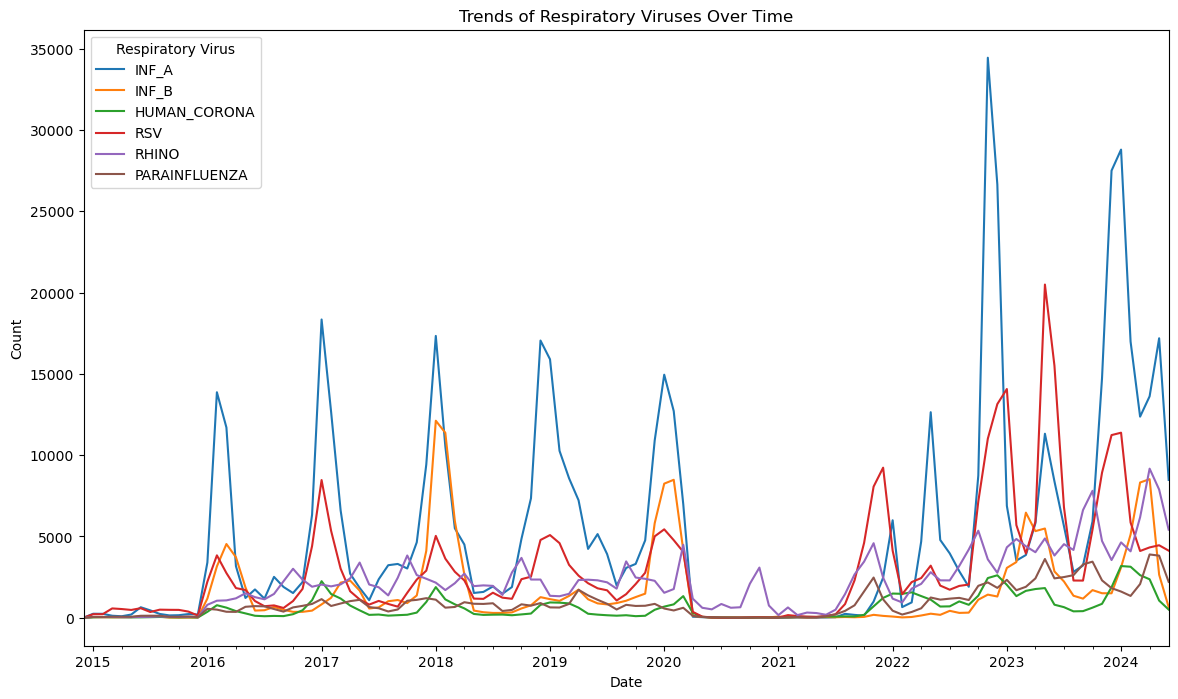

In [9]:
# using .loc[] to access the 'ISO_WEEKSTARTDATE' columns
cleaned_df.loc[:, 'ISO_WEEKSTARTDATE'] = pd.to_datetime(cleaned_df['ISO_WEEKSTARTDATE'], format='%d/%m/%Y') 
# ':' means all rows of 'ISO_WEEKSTARTDATE' columns

# Set the date column as the index
cleaned_df.set_index('ISO_WEEKSTARTDATE', inplace=True)

# Infer the object data types (to avoid future warnings)
cleaned_df = cleaned_df.infer_objects()

# Resample the data by month and sum the counts of each virus
cleaned_df.resample('ME').sum()[virus_list].plot(figsize=(14, 8))

plt.title('Trends of Respiratory Viruses Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Respiratory Virus')

# Save the figure to the 'Outputdata' directory
figure_path = os.path.join(output_dir, 'Trends_of_Respiratory_Viruses_Over_Time.png')
plt.savefig(figure_path)

plt.show()

## Scatter Plot: Comparing CORONA Virus with Other Common Viruses ##

In [10]:
# Slice the Regions and Respiratory Viruses out of the DataFrame
grouped_regions = cleaned_df.groupby('WHOREGION')[virus_list].agg(['sum', 'mean'])

# Group the WHO regions: AR (African Region), EMR (Eastern Mediterranean Region), ER (European Region), AMR (North and South Americans), WPR (Western Pacific Region)
grouped_regions

INF_A                INF_B            HUMAN_CORONA             \
                sum       mean       sum       mean          sum       mean   
WHOREGION                                                                     
AFR          1148.0   3.904762     957.0   3.255102          8.0   0.027211   
AMR        478624.0  79.492443  136666.0  22.698223      52183.0   8.666833   
EMR         47617.0  47.664665   16433.0  16.449449       7682.0   7.689690   
SEAR         4007.0  12.884244    1351.0   4.344051        603.0   1.938907   
WPR         90533.0  89.993042   27369.0  27.205765      13635.0  13.553678   

                RSV                RHINO            PARAINFLUENZA             
                sum       mean       sum       mean           sum       mean  
WHOREGION                                                                     
AFR           430.0   1.462585     311.0   1.057823          15.0   0.051020  
AMR        309297.0  51.369706  208549.0  34.636937       87810.0  14.583956  
EMR         23741.0  23.764765   22938.0  22.960961        9111.0   9.120120  
SEAR         1623.0   5.218650    3527.0  11.340836        1510.0   4.855305  
WPR         15214.0  15.123260   27962.0  27.795229        7110.0   7.067594

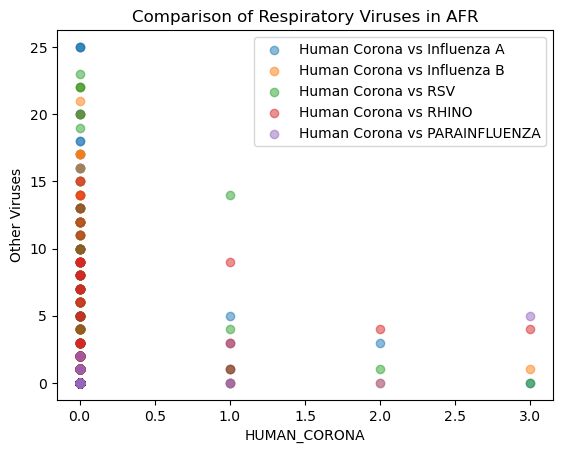

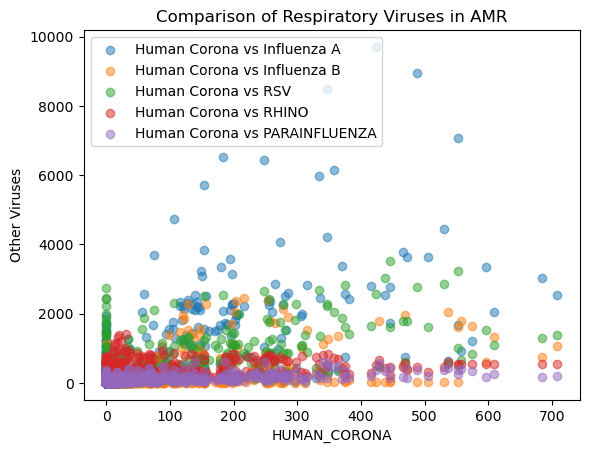

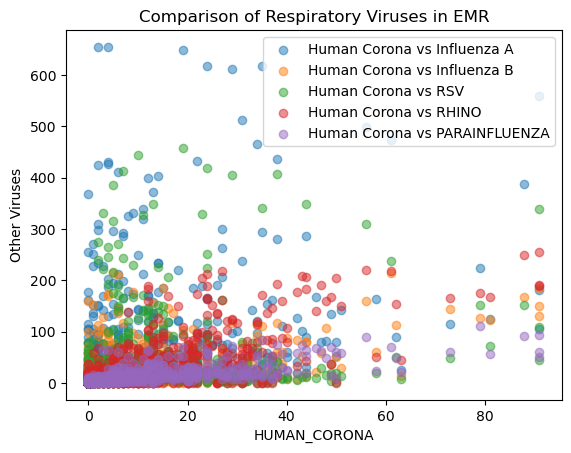

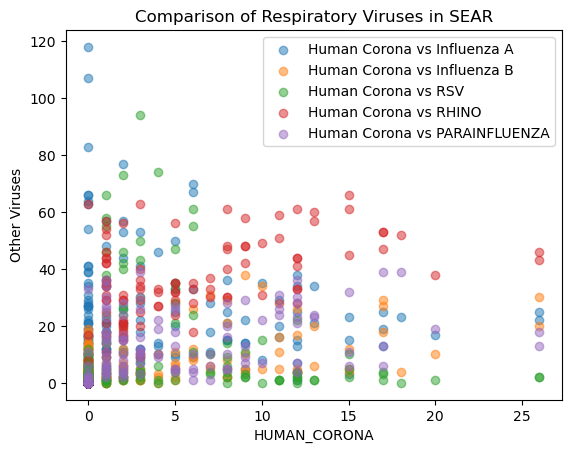

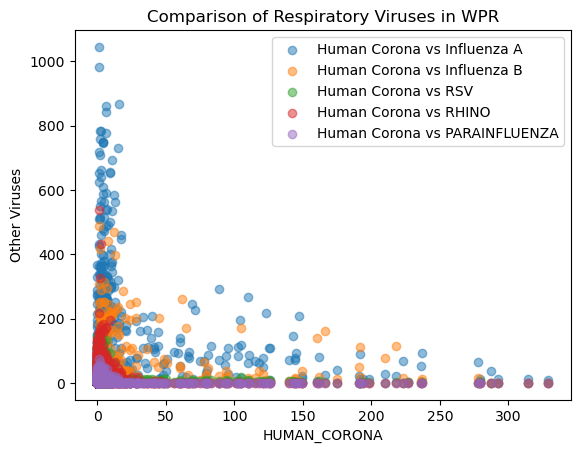

In [11]:
# Using for loop to create scatter plots for each region
for region, region_data in cleaned_df.groupby('WHOREGION'):
    plt.scatter(region_data['HUMAN_CORONA'], region_data['INF_A'], alpha=0.5, label='Human Corona vs Influenza A')
    plt.scatter(region_data['HUMAN_CORONA'], region_data['INF_B'], alpha=0.5, label='Human Corona vs Influenza B')
    plt.scatter(region_data['HUMAN_CORONA'], region_data['RSV'], alpha=0.5, label='Human Corona vs RSV')
    plt.scatter(region_data['HUMAN_CORONA'], region_data['RHINO'], alpha=0.5, label='Human Corona vs RHINO')
    plt.scatter(region_data['HUMAN_CORONA'], region_data['PARAINFLUENZA'], alpha=0.5, label='Human Corona vs PARAINFLUENZA')

    plt.title(f'Comparison of Respiratory Viruses in {region}')
    plt.xlabel('HUMAN_CORONA')
    plt.ylabel('Other Viruses')
    plt.legend()
    plt.show()

## Box Plot: Distribution and Outliers for Different Viruses Counts across Regions ##

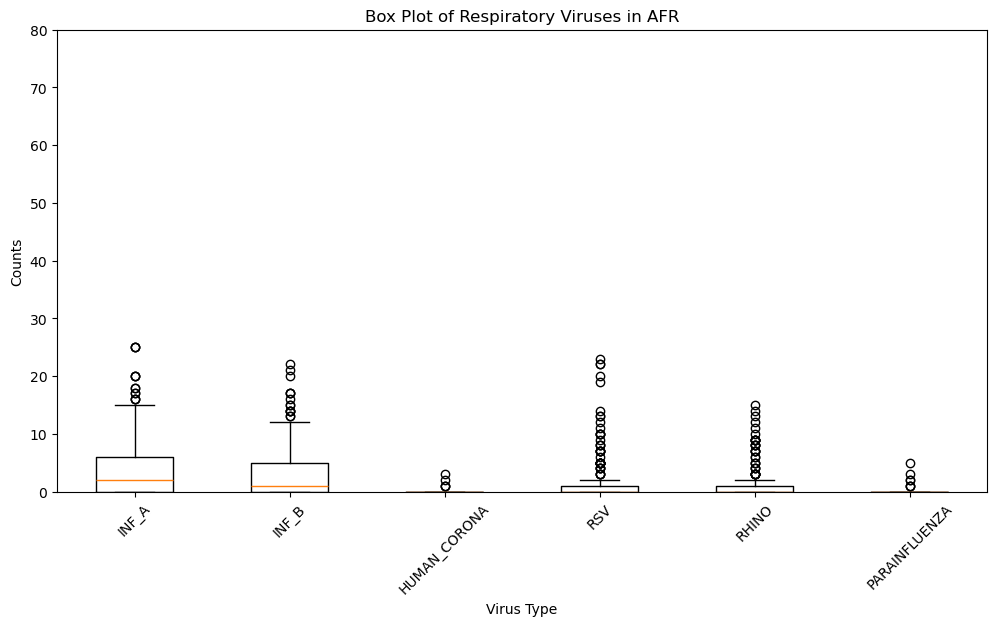

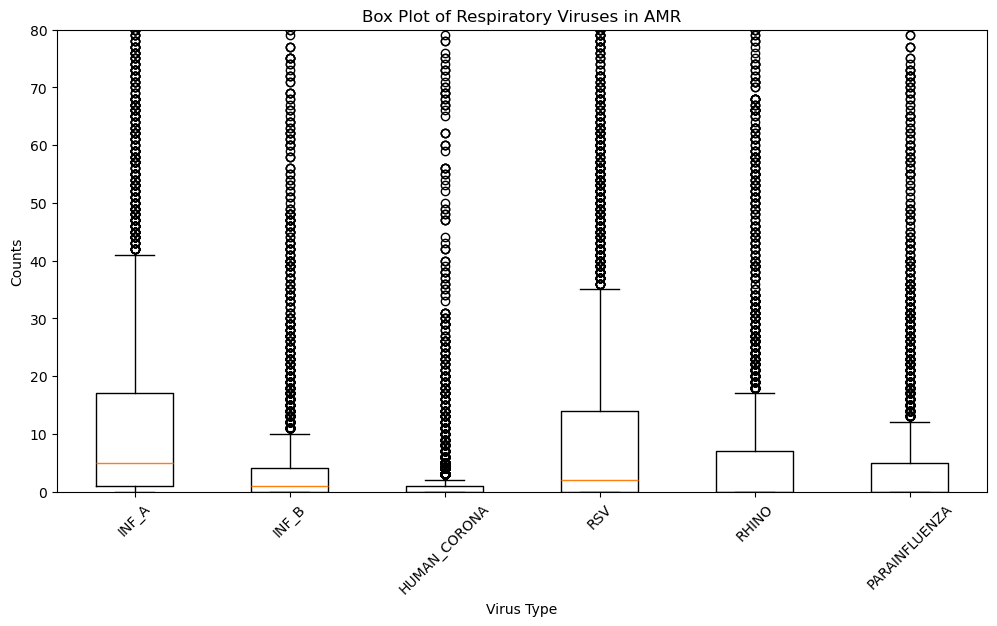

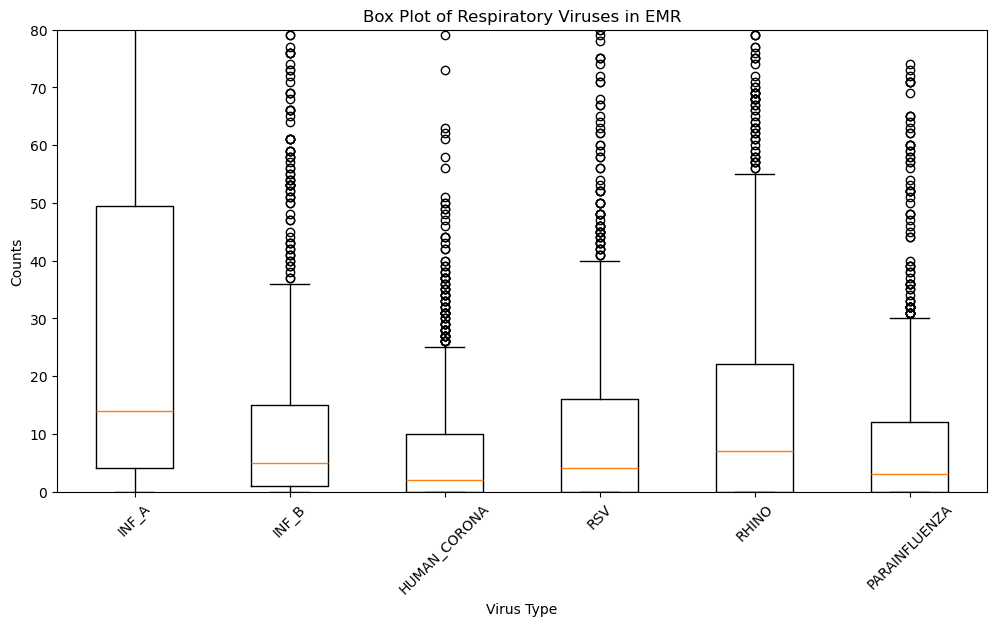

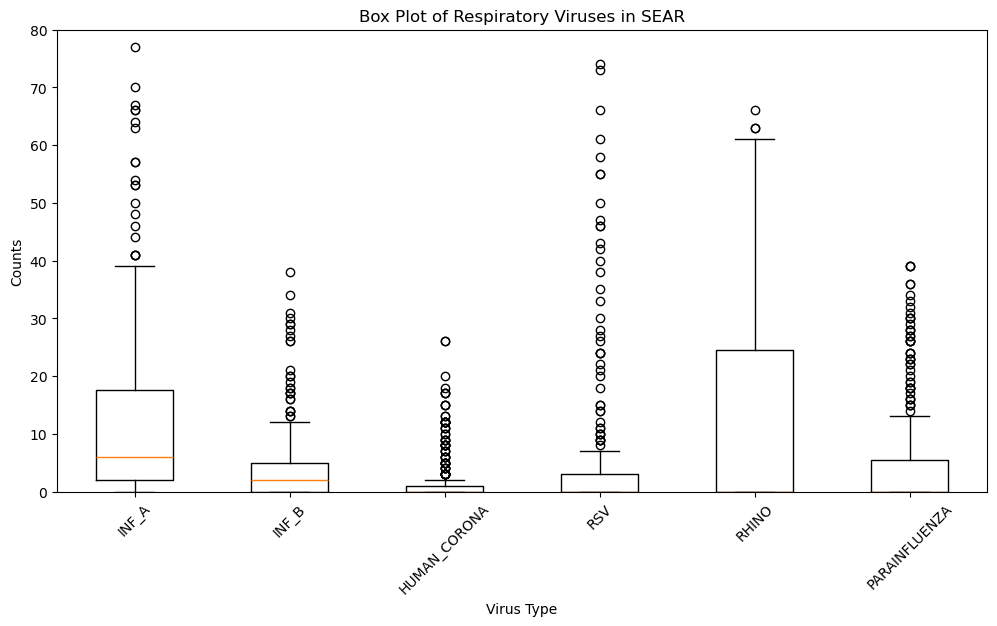

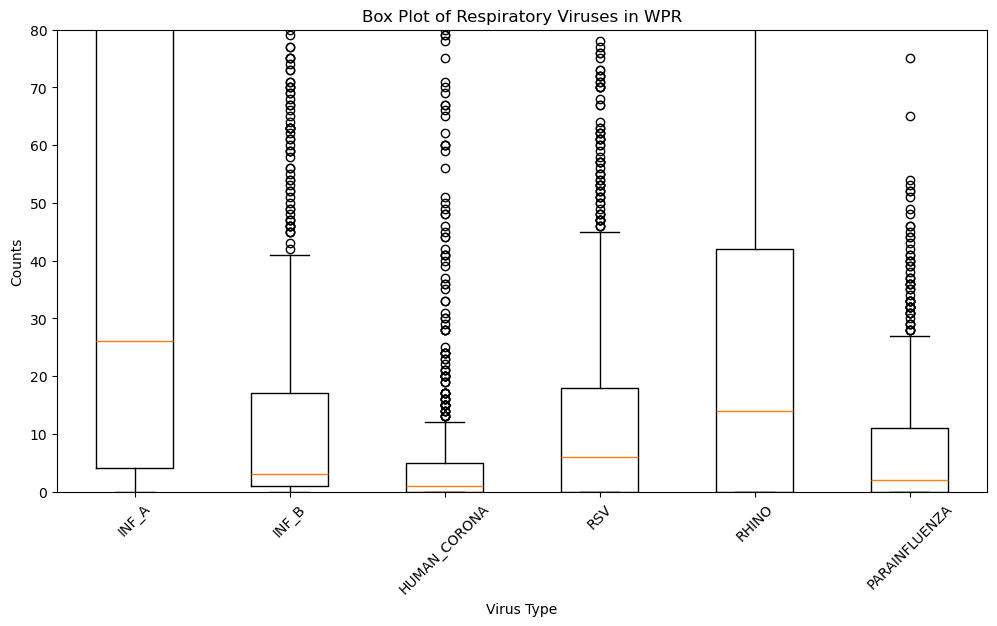

In [12]:
for region, region_data in cleaned_df.groupby('WHOREGION'):
    plt.figure(figsize=(12, 6))

    plt.boxplot([region_data[virus].dropna()
                 for virus in virus_list],
                labels=virus_list)
    plt.ylim(0, 80)  # Adjust the limit as per the data distribution
    
    plt.title(f'Box Plot of Respiratory Viruses in {region}')
    plt.xlabel('Virus Type')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.show()

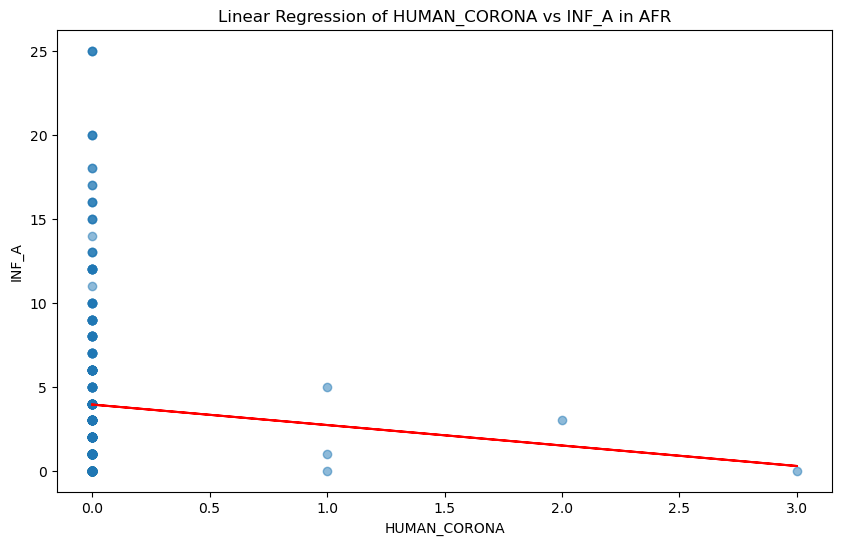

The r^2-value is: 0.0032883857220683864


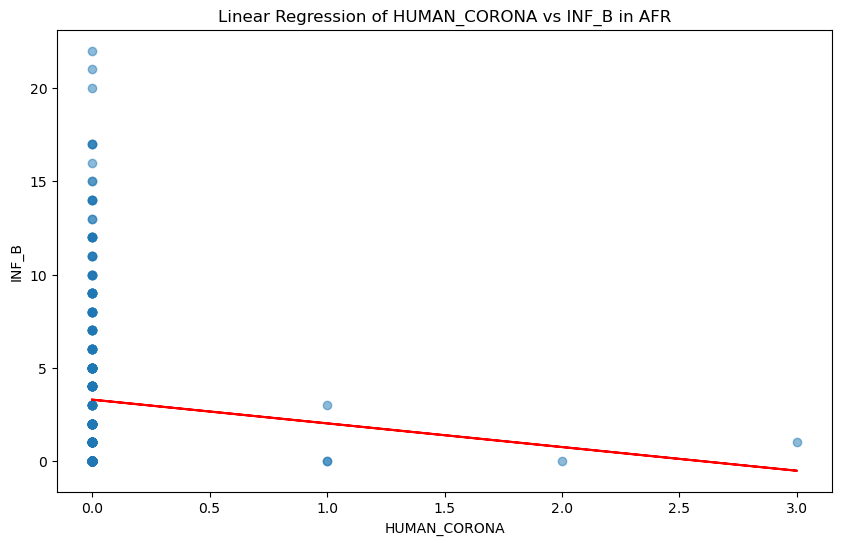

The r^2-value is: 0.0044773003781026265


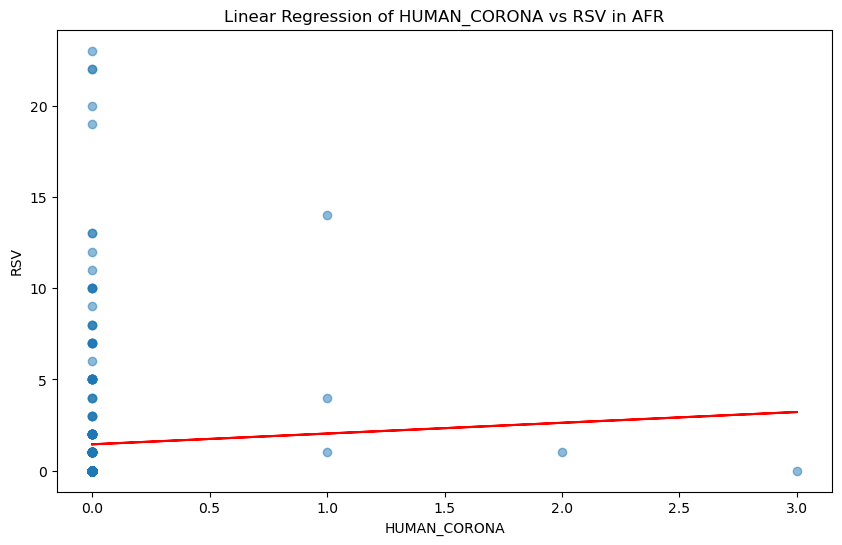

The r^2-value is: 0.0014294957558100008


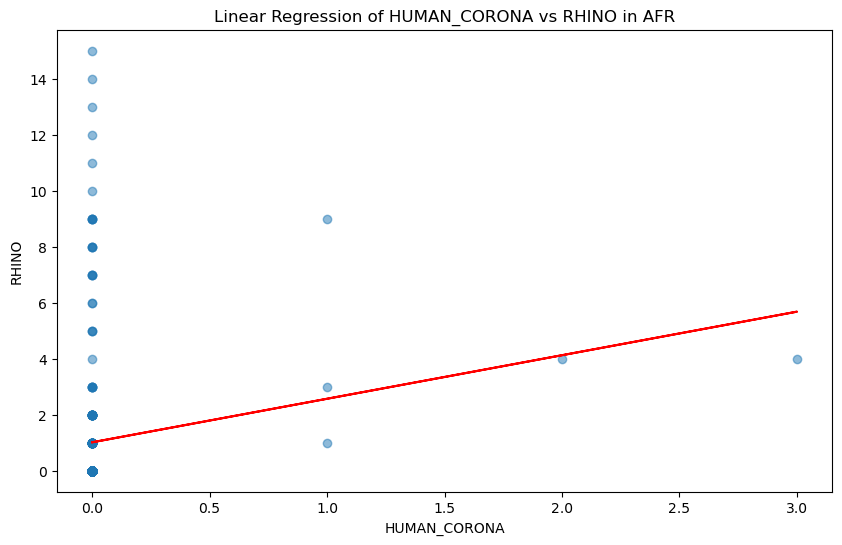

The r^2-value is: 0.01988998755152951


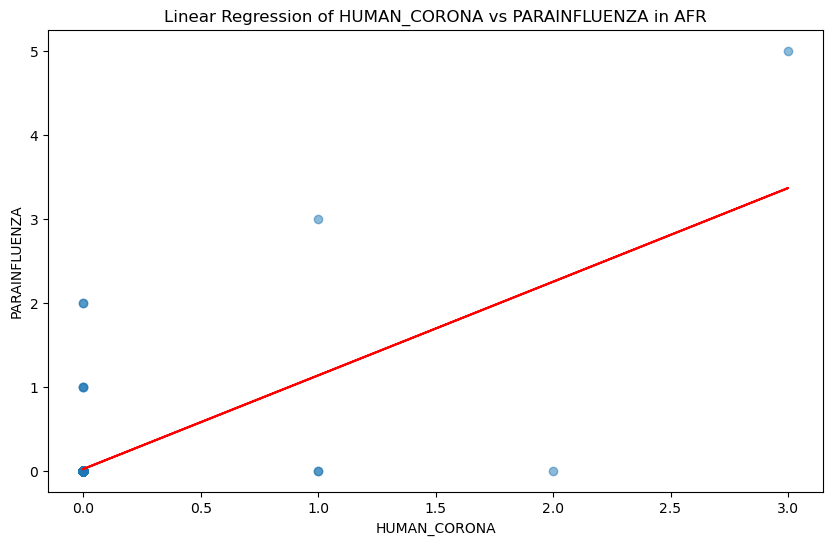

The r^2-value is: 0.44329077675695017


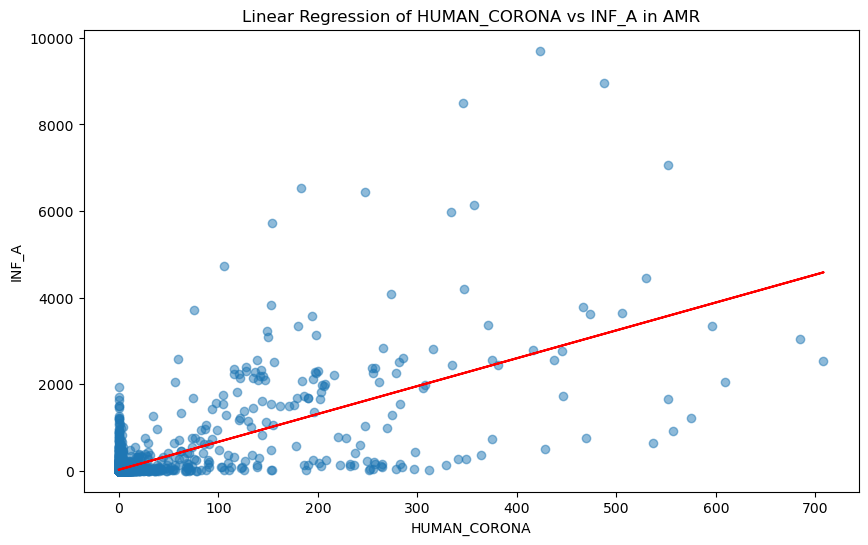

The r^2-value is: 0.4725619630336713


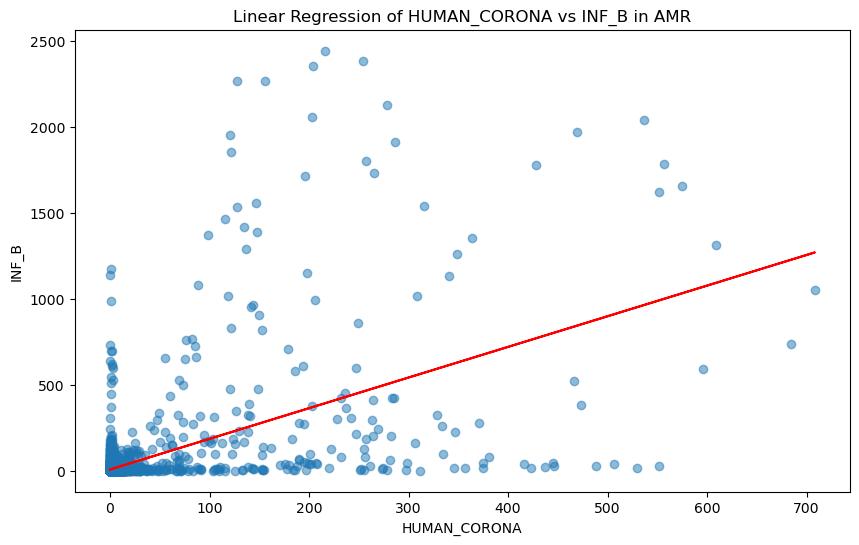

The r^2-value is: 0.30517591354511


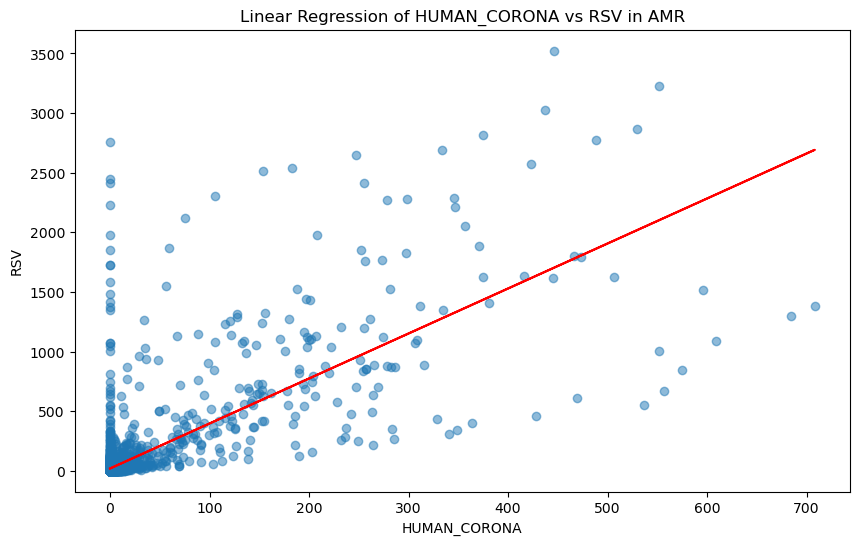

The r^2-value is: 0.5376796941394802


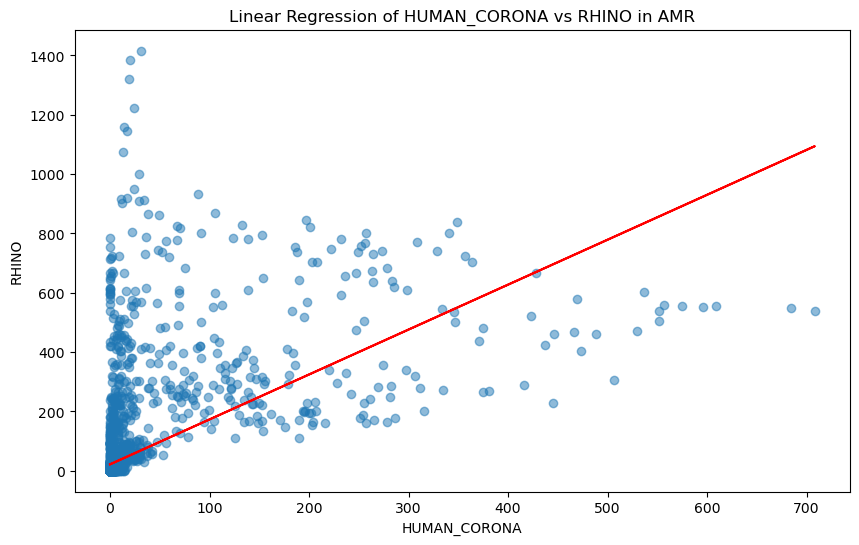

The r^2-value is: 0.31863608400550725


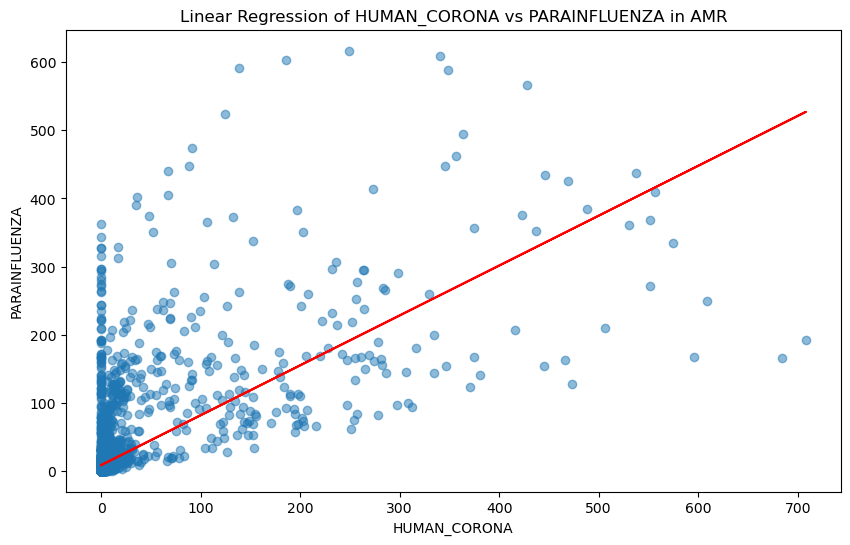

The r^2-value is: 0.43472471187677775


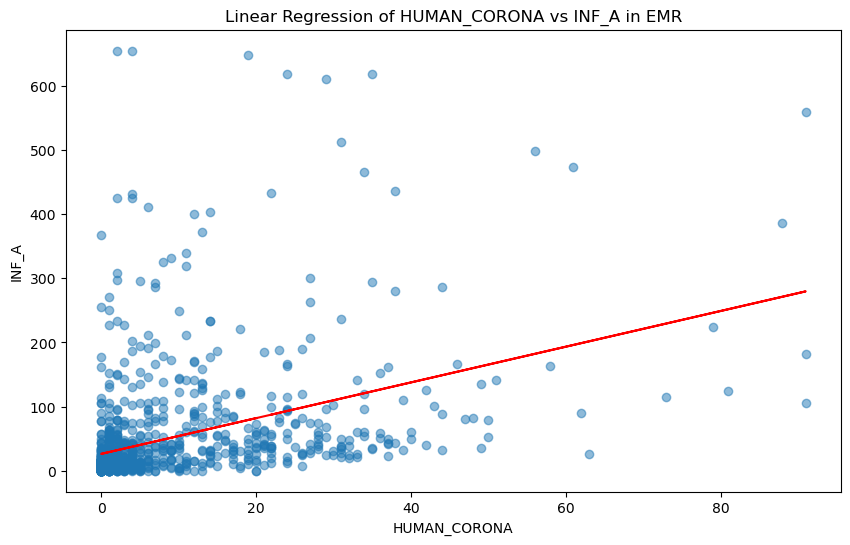

The r^2-value is: 0.1615350018154558


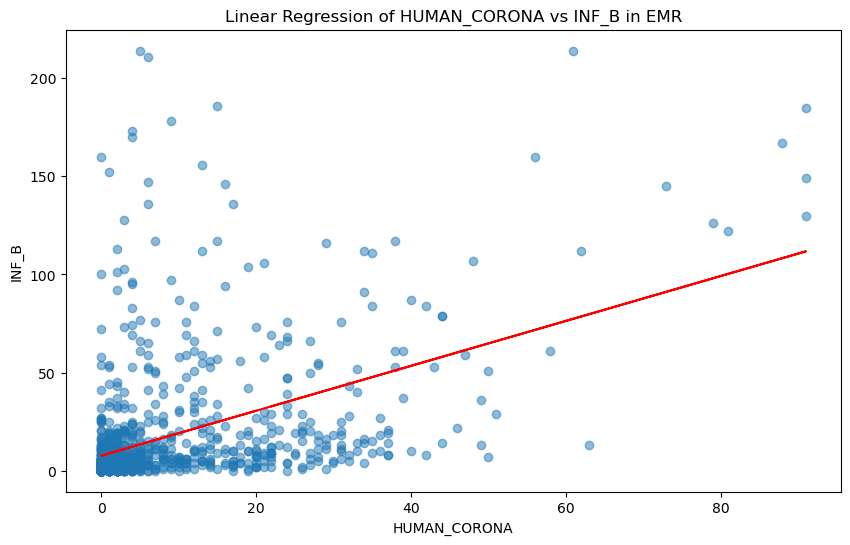

The r^2-value is: 0.22339354719642388


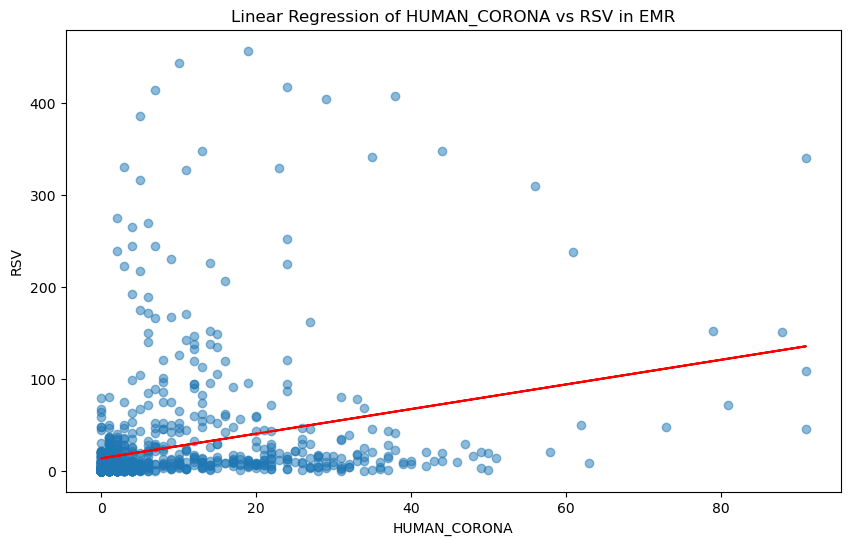

The r^2-value is: 0.08360333416738758


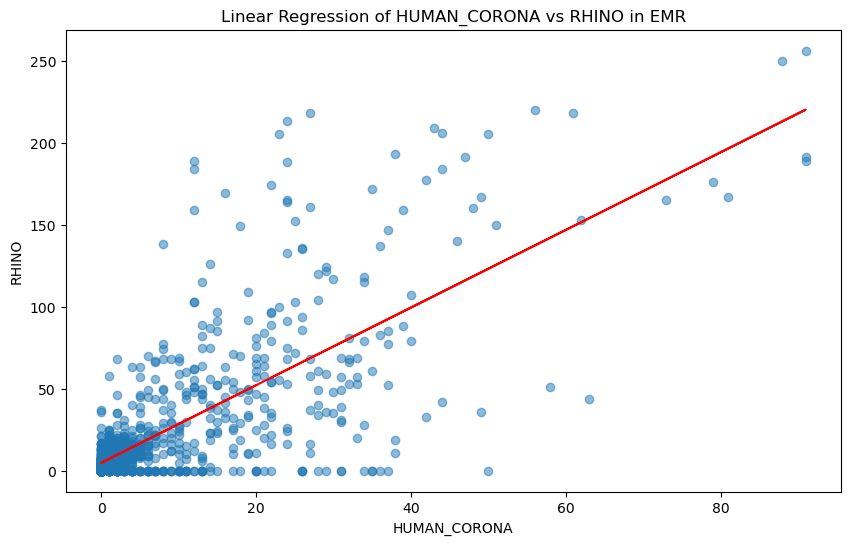

The r^2-value is: 0.5511898277486164


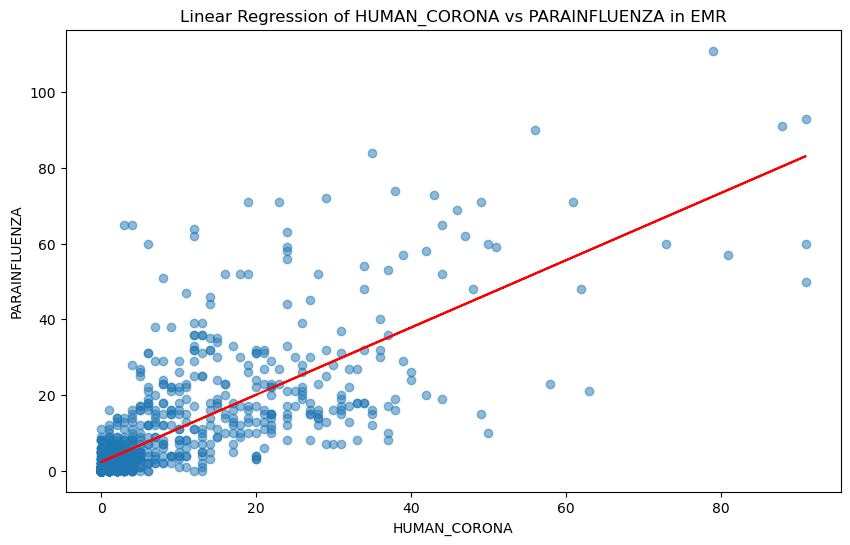

The r^2-value is: 0.5693864639742915


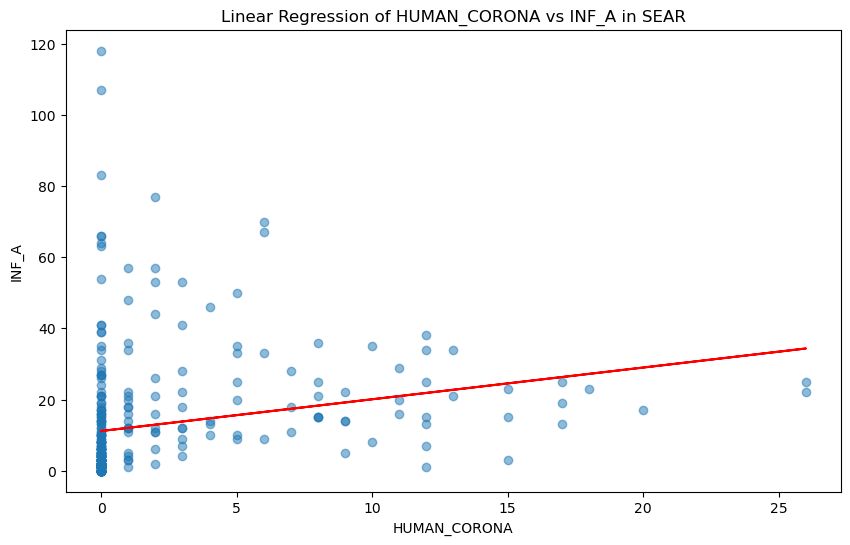

The r^2-value is: 0.0487616317085161


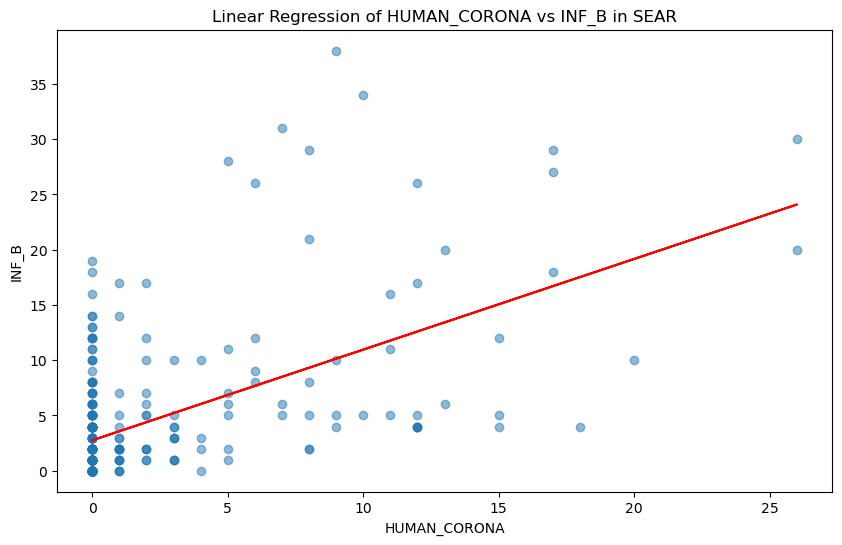

The r^2-value is: 0.3064363814552378


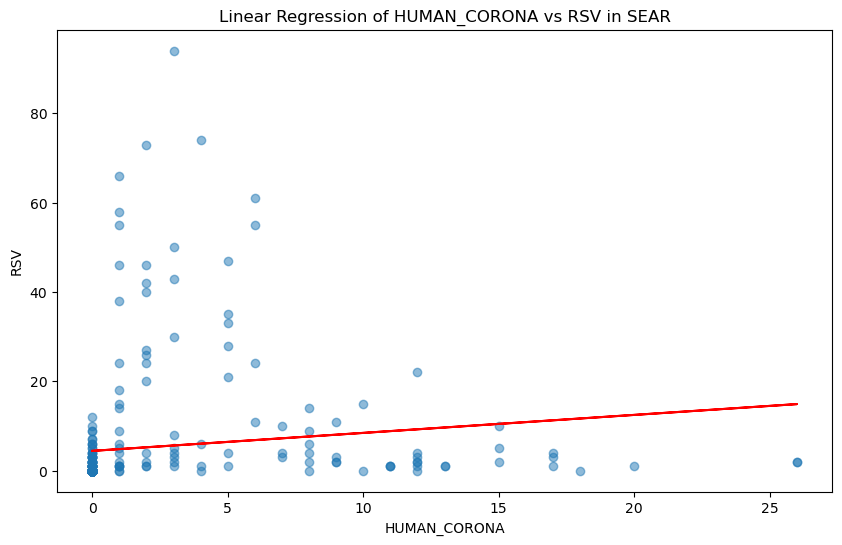

The r^2-value is: 0.01671681605026351


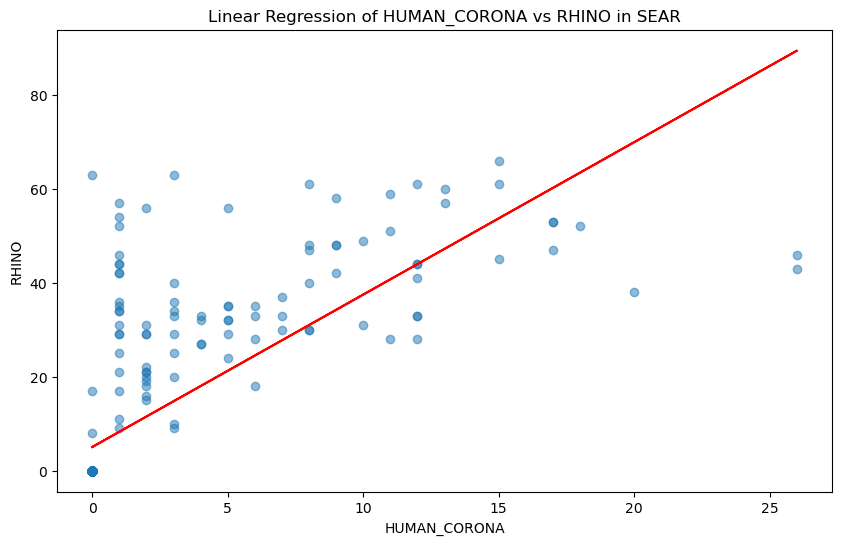

The r^2-value is: 0.5622716678577069


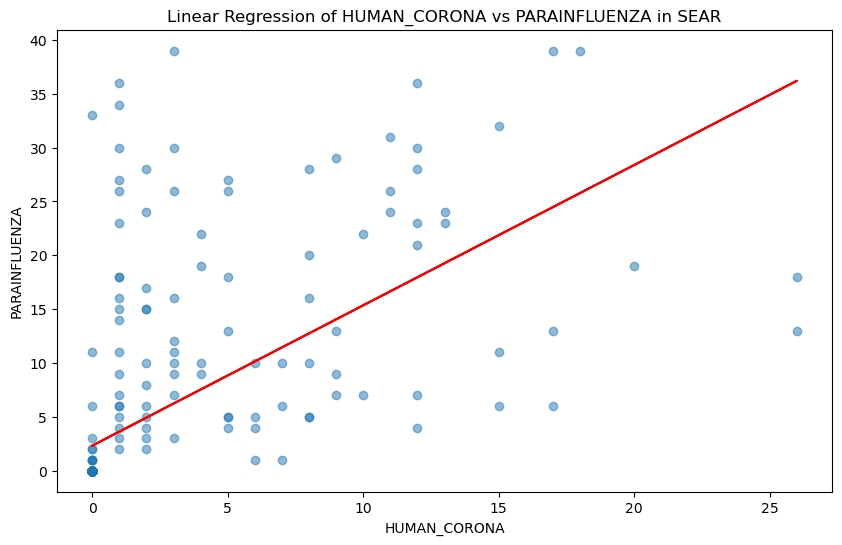

The r^2-value is: 0.3717174236341465


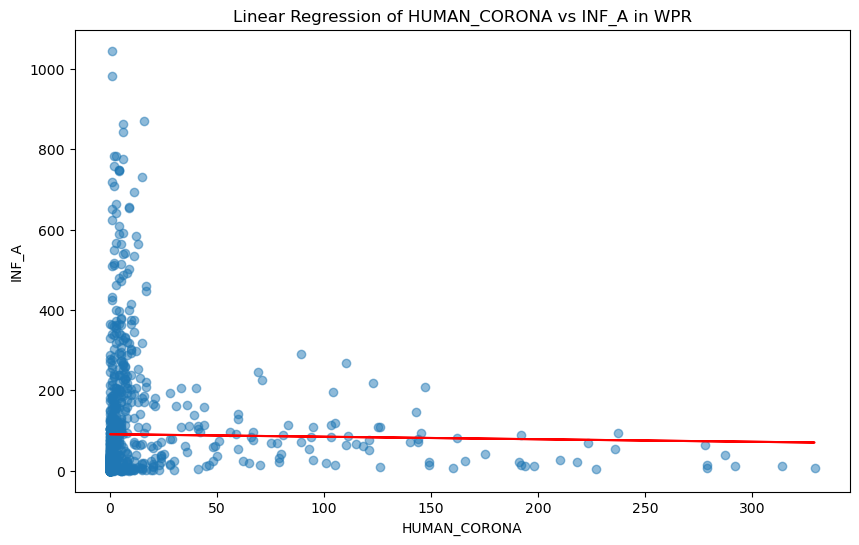

The r^2-value is: 0.0002791220077993379


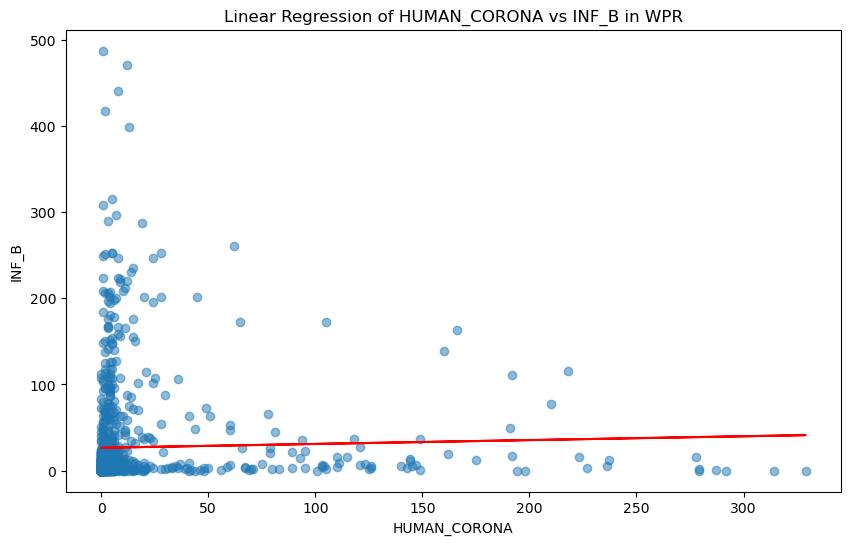

The r^2-value is: 0.0008925576066504865


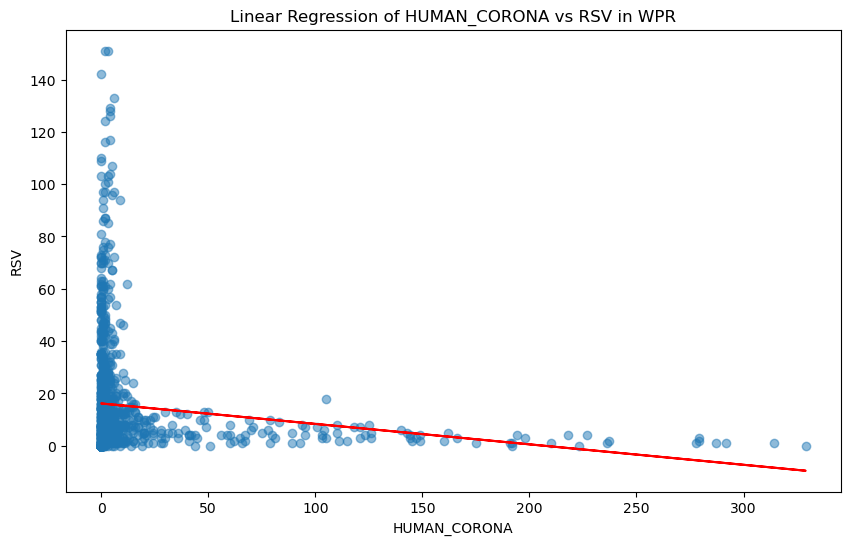

The r^2-value is: 0.018208455027355627


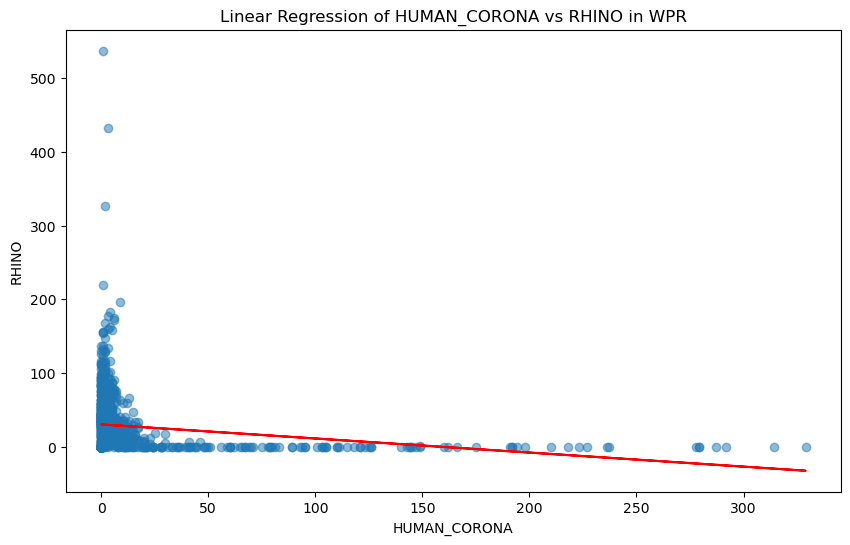

The r^2-value is: 0.034698645406570604


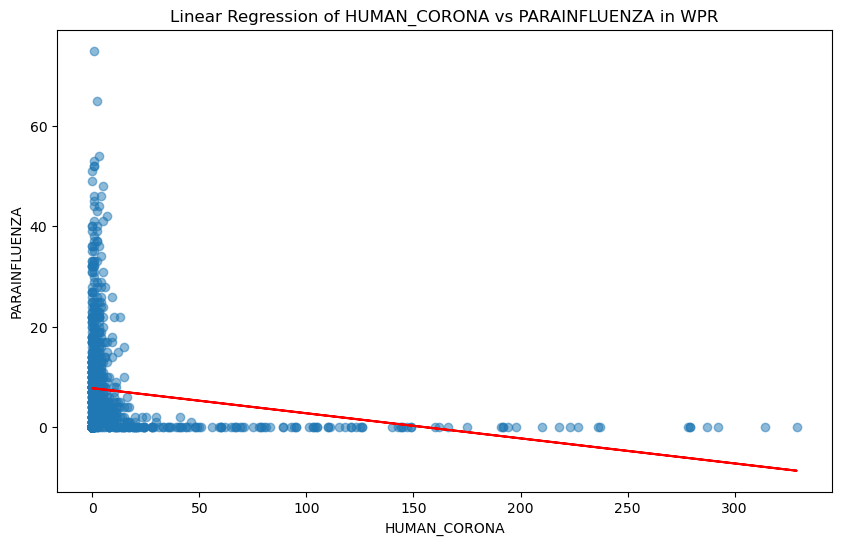

The r^2-value is: 0.037486225093297555


In [13]:
# Function to plot linear regression
def plot_linear_regression(x, y, xlabel, ylabel, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5)
    # Fit line
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
    # Print r-squared value
    print(f"The r^2-value is: {r_value**2}")

# Create linear regression plots for each region
for region, region_data in cleaned_df.groupby('WHOREGION'):
    plot_linear_regression(region_data['HUMAN_CORONA'].dropna(), region_data['INF_A'].dropna(), 'HUMAN_CORONA', 'INF_A', f'Linear Regression of HUMAN_CORONA vs INF_A in {region}')
    plot_linear_regression(region_data['HUMAN_CORONA'].dropna(), region_data['INF_B'].dropna(), 'HUMAN_CORONA', 'INF_B', f'Linear Regression of HUMAN_CORONA vs INF_B in {region}')
    plot_linear_regression(region_data['HUMAN_CORONA'].dropna(), region_data['RSV'].dropna(), 'HUMAN_CORONA', 'RSV', f'Linear Regression of HUMAN_CORONA vs RSV in {region}')
    plot_linear_regression(region_data['HUMAN_CORONA'].dropna(), region_data['RHINO'].dropna(), 'HUMAN_CORONA', 'RHINO', f'Linear Regression of HUMAN_CORONA vs RHINO in {region}')
    plot_linear_regression(region_data['HUMAN_CORONA'].dropna(), region_data['PARAINFLUENZA'].dropna(), 'HUMAN_CORONA', 'PARAINFLUENZA', f'Linear Regression of HUMAN_CORONA vs PARAINFLUENZA in {region}')


## Map: World Spread ##

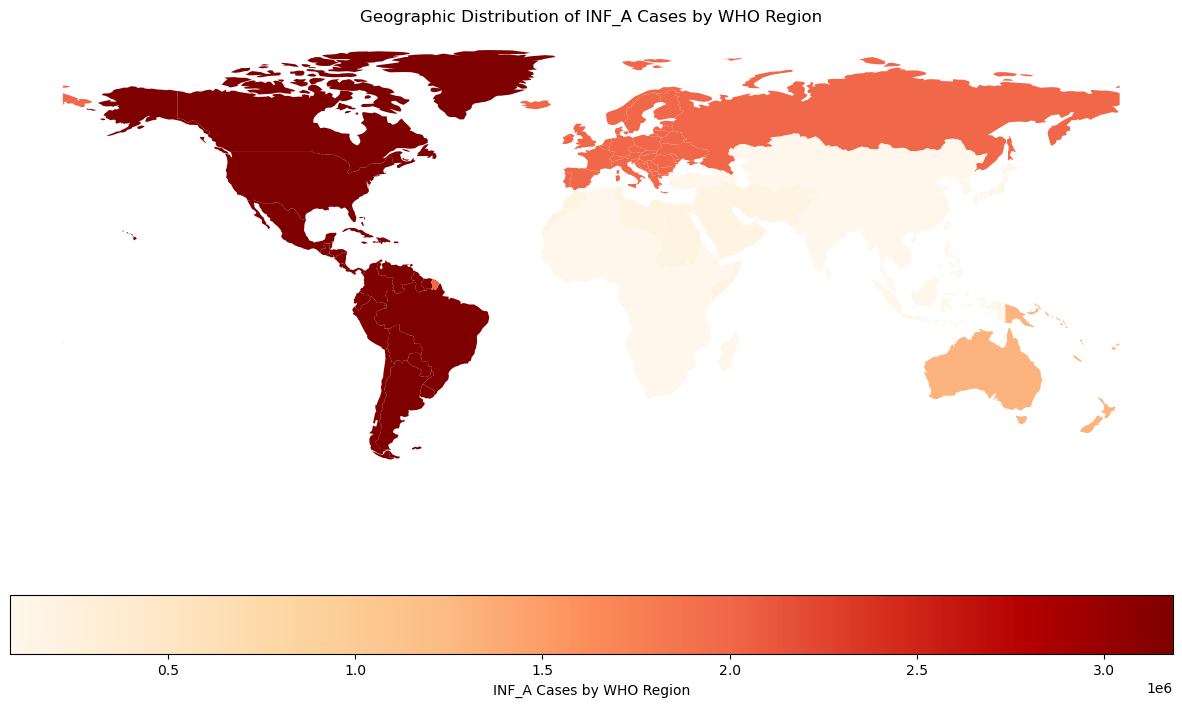

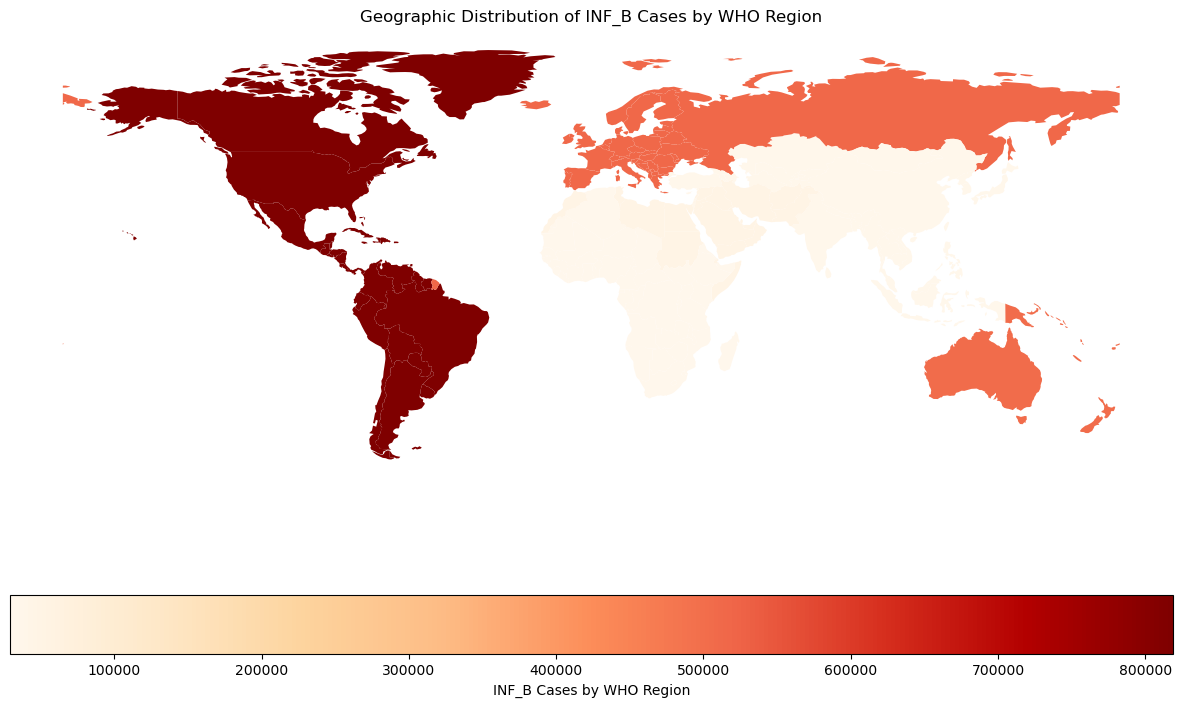

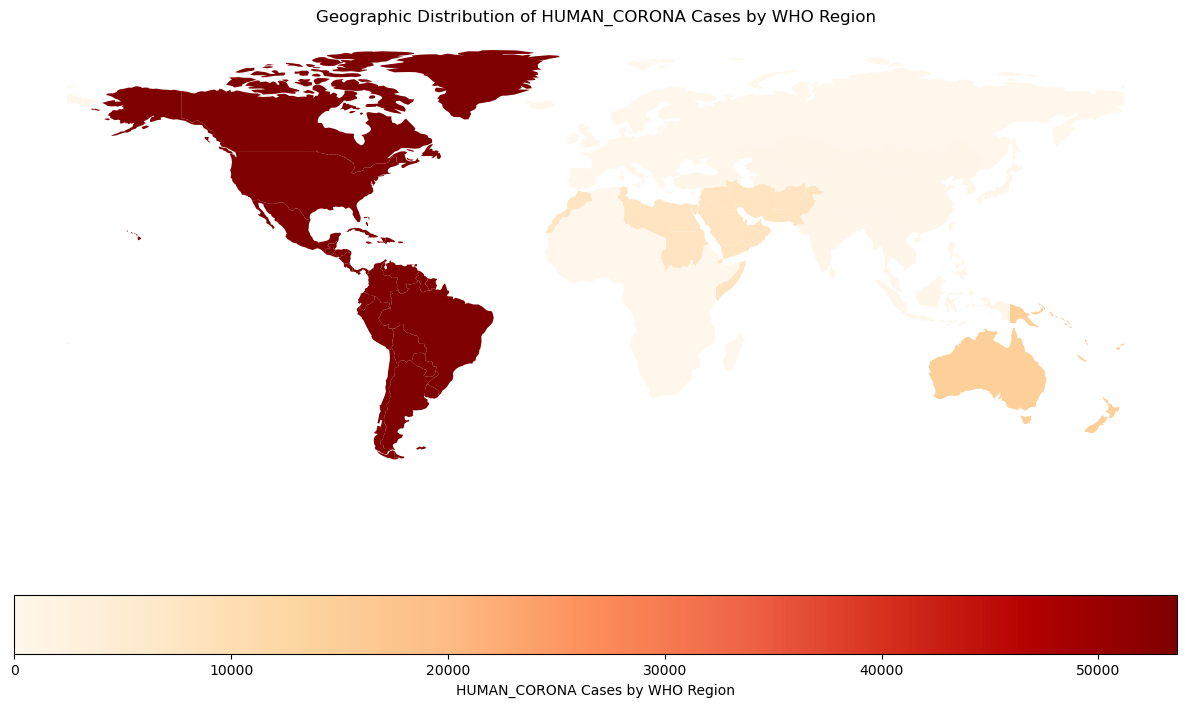

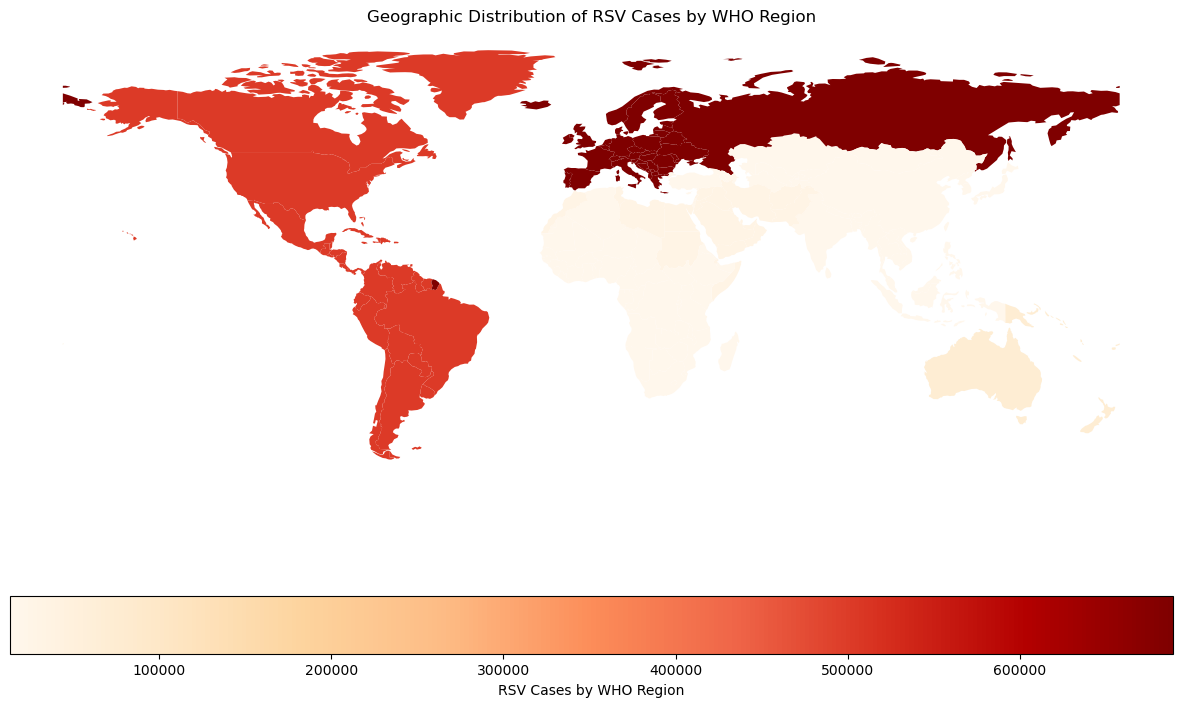

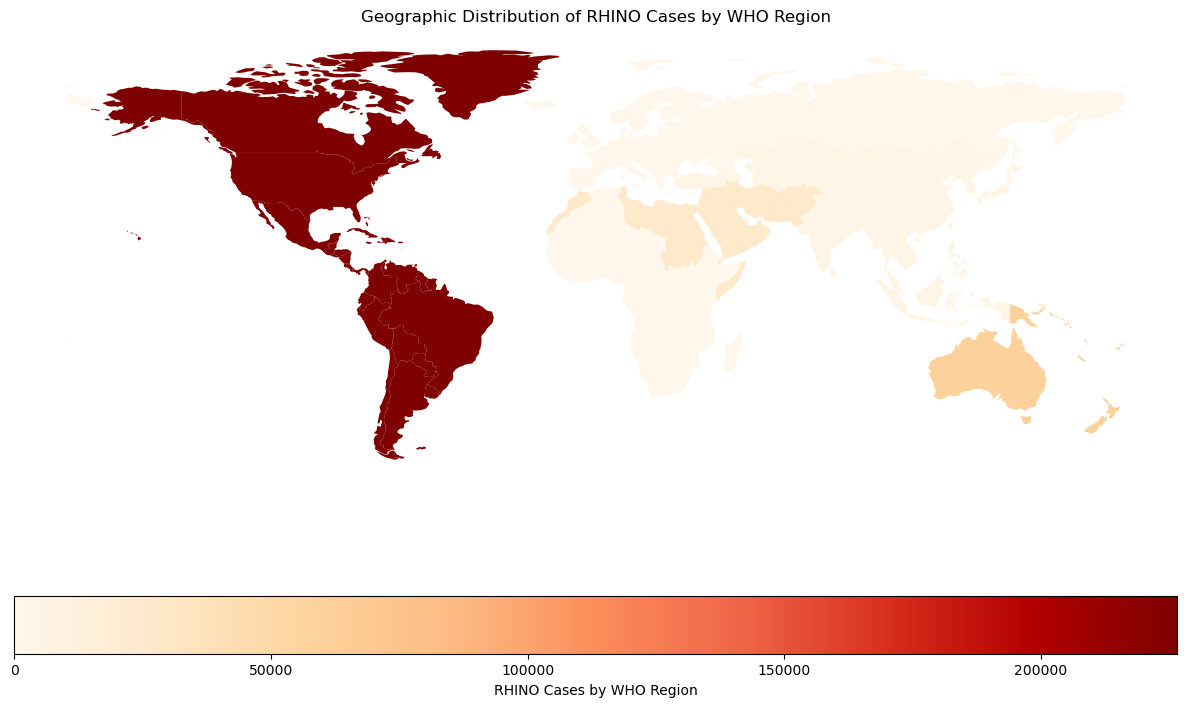

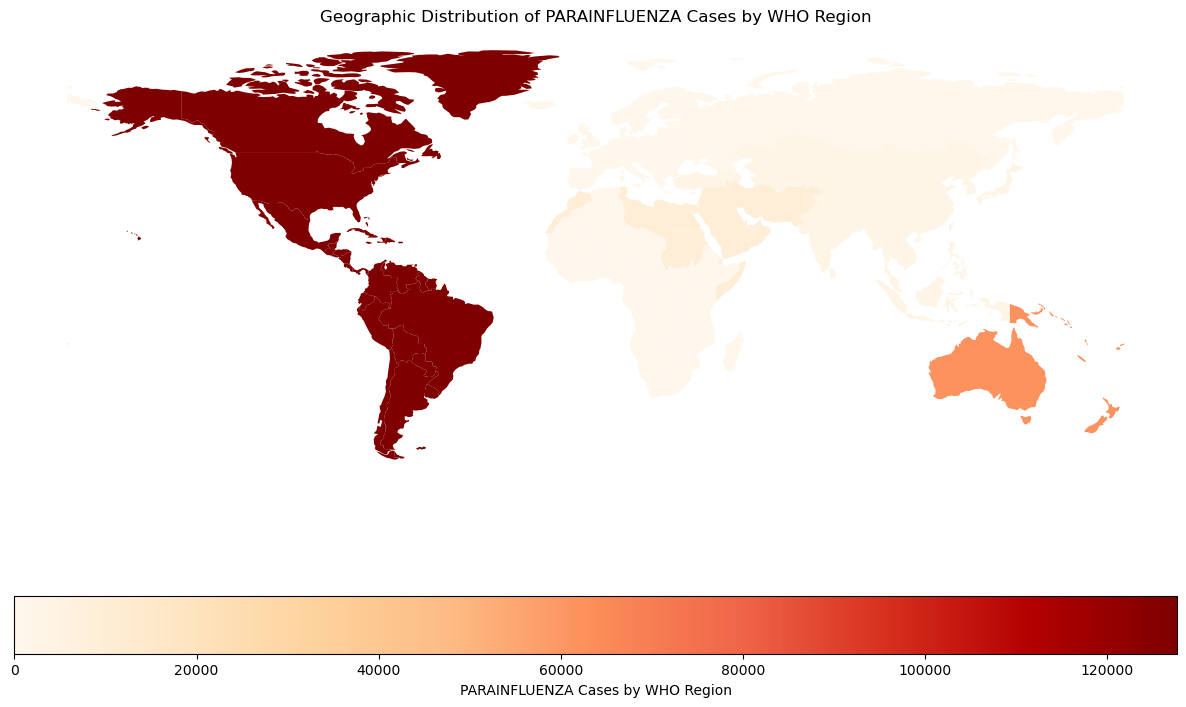

In [29]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.patches import Patch

# Load the Natural Earth 'low resolution' dataset from the provided path
shapefile_path = 'natural_earth/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

# Display the columns to verify the structure
# print(world.columns)

# Define a dictionary to map continents to WHO regions for approximation
continent_to_who_region = {
    'Africa': 'AFR',
    'North America': 'AMR',
    'South America': 'AMR',
    'Asia': 'SEAR',  # SEAR and WPR both contain parts of Asia
    'Europe': 'EUR',
    'Oceania': 'WPR'  # WPR contains parts of Oceania and Asia
}

# Manually adjust for Middle East and other regions not fitting neatly into continents
middle_east_countries = ['Afghanistan', 'Bahrain', 'Djibouti', 'Egypt', 'Iran', 'Iraq', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Morocco', 'Oman', 'Pakistan', 'Palestine', 'Qatar', 'Saudi Arabia', 'Somalia', 'Sudan', 'Syria', 'Tunisia', 'United Arab Emirates', 'Yemen']

# WHO region mapping
who_region_mapping = {
    'AFR': ['Africa'],
    'AMR': ['North America', 'South America'],
    'SEAR': ['Asia'],  
    'EUR': ['Europe'],
    'WPR': ['Oceania', 'Asia']  
}

# Add a new column to the GeoDataFrame for WHO regions based on country names
def map_to_who_region(country, continent):
    if country in middle_east_countries:
        return 'EMR'  # Assuming EMR for Middle East region
    return continent_to_who_region.get(continent, None)

world['WHO_REGION'] = world.apply(lambda row: map_to_who_region(row['ADMIN'], row['CONTINENT']), axis=1)

# Verify the mapping
# print(world[['ADMIN', 'WHO_REGION']].head())

# Ensure the WHO region names in your data match those in the GeoDataFrame
respiratory_viruses_data['WHOREGION'] = respiratory_viruses_data['WHOREGION'].str.upper()


# Create choropleth maps for each virus
for virus in virus_list:
    # Aggregate the sum of virus cases by WHO region
    virus_data = respiratory_viruses_data.groupby('WHOREGION')[[virus]].sum().reset_index()

    # Merge the virus data with the GeoDataFrame
    map_data = world.merge(virus_data, left_on='WHO_REGION', right_on='WHOREGION', how='left') # virus_data may have 'NaN' values
    # 'WHO_REGION' column in the world GeoDataFrame contains the values that will be matched with the virus_data DataFrame.
    # while 'WHOREGION' column in the virus_data DataFrame contains the values that will be matched with the WHO_REGION column in the world GeoDataFrame.

    # Plot the choropleth map
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    map_data.plot(column=virus, ax=ax, legend=True, cmap='OrRd', 
                  legend_kwds={'label': f'{virus} Cases by WHO Region', 'orientation': 'horizontal'})
    # The ax parameter specifies the Matplotlib axes object where the plot will be drawn.
    # OrRd' is a colormap name that stands for "Orange-Red," which will color the shapes in shades ranging from orange to red based on their data values
    # The legend_kwds parameter is a dictionary that allows you to customize the legend.
    # And 'orientation': 'horizontal' is to specify the legend should be oriented horizontally
    
    ax.set_title(f'Geographic Distribution of {virus} Cases by WHO Region')
    ax.set_axis_off()
    # ax.set_axis_off(): Turns off the axis lines and labels for the ax axes object.
    
    # Save the figure to the 'Outputdata' directory
    figure_path = os.path.join(output_dir, f'Geographic_Distribution_of_{virus}.png')
    plt.savefig(figure_path)
    
    plt.show()
